Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [26]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

### Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

In [27]:
# world happiness report
# https://www.kaggle.com/unsdsn/world-happiness
df = pd.read_csv('2017.csv')
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [248]:
# happiness as a result of freedom
X = df['Freedom']
Y = df['Happiness.Score']

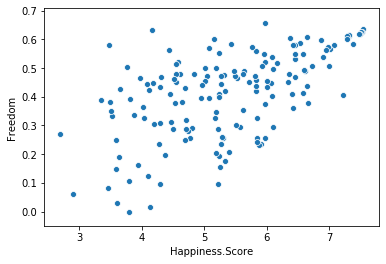

In [249]:
sns.scatterplot(Y, X)

In [250]:
# split data into train and test groups
X = pd.DataFrame(df.Freedom)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [254]:
# build our model
knn = neighbors.KNeighborsRegressor(n_neighbors=15)
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

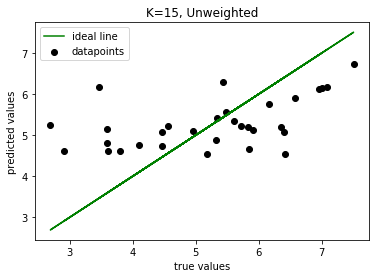

In [271]:
# make predictions
Y_ = knn.predict(x_test)

plt.scatter(y_test, Y_, c='k', label='datapoints')
plt.plot(y_test, y_test, c='g', label='ideal line')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title('K=15, Unweighted')
plt.legend()
plt.show()

In [256]:
score = cross_val_score(knn, x_test, y_test, cv=4)
print(score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

[0.05338085 0.10465547 0.13267209 0.34428601]
Accuracy: 0.16 (+/- 0.22)


In [260]:
# build model
ols = sm.OLS(y_train, x_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness.Score   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              1472.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):                    2.76e-70
Time:                        17:57:51   Log-Likelihood:                         -228.29
No. Observations:                 124   AIC:                                      458.6
Df Residuals:                     123   BIC:                                      461.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Freedom       11.9918      0.313     38.361      0.000      11.373      12.611
==============================================================================
Omnibus:                        2.883   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.912
Skew:                           0.355   Prob(JB):                        0.233
Kurtosis:                       2.755   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

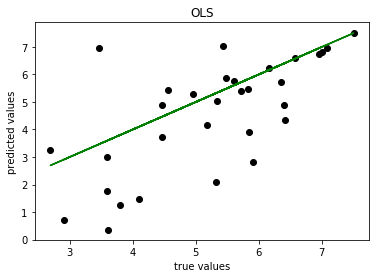

In [272]:
# make predictions
Y_ = ols.predict(x_test)

plt.scatter(y_test, Y_, c='k', label='datapoints')
plt.plot(y_test, y_test, c='g', label='ideal line')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title('OLS')
plt.show() 

OLS was a much more accurate model according to the above graphs and R-squared scores.